In [1]:
# steps and deliverables:

# 1. Import your data into a Pandas DataFrame.
# 1a.Look through data and look for blanks/anomolies.  
# 2. Merge your DataFrames.
# 3. Create a bubble chart that showcases the average fare versus total number of rides with bubble size based on the total number of 
    # drivers for each city type, including urban, suburban, and rural.
# 4. Determine the mean, median, and mode for the following:
    # a. The total number of rides for each city type.
    # b. The average fares for each city type.
    # c. The total number of drivers for each city type.
# 5. Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
    # a. The number of rides for each city type.
    # b. The fares for each city type.
    # c. The number of drivers for each city type.
# 6. Create a pie chart that visualizes each of the following data for each city type:
    # a. The percent of total fares.
    # b. The percent of total rides.
    # c. The percent of total drivers.

In [2]:
# 1. Import your data into a Pandas DataFrame.
# Add Matplotlib inline magic command
%matplotlib inline

# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Files to Load / make variables
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = "Resources/ride_data.csv"

# Read the files and store in DataFrames
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)


In [3]:
# 1a.Look through data and look for blanks/anomolies. 

# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [4]:
# 5.2.4 Get the columns and the rows that are not null 
# count method
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [5]:
# 5.2.4 Determine if there are any missing values in the city_data_df.
# The isnull() method
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
# 5.2.4 Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [8]:
# Get the data types of each column.
ride_data_df.dtypes


city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [9]:
# 5.2.4 Get the columns and the rows that are not null 
# count method
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [10]:
# 5.2.4 Determine if there are any missing values in the ride_data_df.
# The isnull() method
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [11]:
# 2. (5.2.4) # Merge DataFrames
pyber_data_df = pd.merge(ride_data_df, city_data_df, 
                                  how="left", on=["city", "city"])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [12]:
# 3. Create a bubble chart that showcases the average fare versus total number of rides with bubble size based on the total number of 
    # drivers for each city type, including urban, suburban, and rural.


# a. To get the average fare, we can use the Pandas mean() method for 
# each city in the "fare" column.
# b. To get the total number of rides for each city, we can use the 
# Pandas count() method for each city in the "ride_id" column.
# c. To make the bubble size correlate to the number of drivers for 
# each city, we can get the average driver_count for each city.


# 3a. 5.3.1 Create DataFrames for Each Type of City

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [13]:
# 3b. 5.3.2 Get the Number of Rides for Each City Type

urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count.head()


city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [14]:
# 5.3.3 Get the Average Fare for Each City Type

urban_average_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_average_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_average_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

rural_average_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [15]:
# 3c. 5.3.4 Get the Average Number of Drivers for Each City Type

urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).count()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).count()["driver_count"]

urban_driver_count.head()


city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

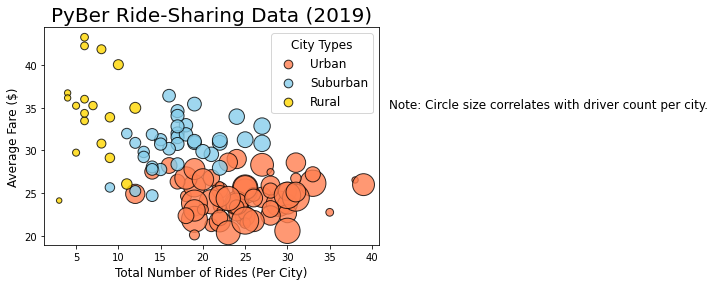

In [16]:
# 3.  5.3.5 Create Bubble Charts - MATLAB Method

# =====Urban Cities=====

plt.scatter(urban_ride_count, urban_average_fare, s = 10*urban_driver_count, label="Urban", 
           c= "coral", alpha=0.8, edgecolor="black", linewidths=1,)

# Create axis labels, title and legend
# plt.xlabel("Total Number of Rides (Per City)")
# plt.ylabel("Average Fare ($)")
# plt.title("PyBer Ride-Sharing Data (2019)")
plt.legend()


# =====Suburban Cities=====

plt.scatter(suburban_ride_count, suburban_average_fare, s = 10*suburban_driver_count, label="Suburban", 
           color = "skyblue", alpha=0.8, edgecolor="black", linewidths=1,)

# Create axis labels, title and legend
# plt.xlabel("Total Number of Rides (Per City)")
# plt.ylabel("Average Fare ($)")
# plt.title("PyBer Ride-Sharing Data (2019)")
plt.legend()


# =====Rural Cities=====

plt.scatter(rural_ride_count, rural_average_fare, s = 10*rural_driver_count, label="Rural", 
           c= "gold", alpha=0.8, edgecolor="black", linewidths=1,)

# Create axis labels, title and legend
plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)
plt.ylabel("Average Fare ($)", fontsize = 12)
plt.title("PyBer Ride-Sharing Data (2019)", fontsize = 20)
plt.legend()
# plt.grid(True)


#Create a Legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)


# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")


# Save the figure.
plt.savefig("analysis/Fig1.png")


In [17]:
# 5.4.1 Summary Statistics for ***Number of Rides by City Type****

#Use the followig:
    # Pandas FUNCTION, describe(), on DataFrame/Series
    # Pandas METHODS, mean(), median() and mode(), on a Series.
    # NumPy FUNCTIONS, mean(), median() and mode(), on a Series.
    # SciPy stats FUNCTION, mode(), of a SERIES.
    
    
# Get summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [18]:
# Get summary statistics.
suburban_cities_df.describe()


,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [19]:
# Get summary statistics.
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [20]:
# Get summary statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [21]:
# Get summary statistics.
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [22]:
# Get summary statistics.
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [23]:
# 5.4.1 Calculate the mean of the ride count for each city type.
# Pandas mean()
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [24]:
# 5.4.1 Calculate the median of the ride count for each city type.
# Pandas median()
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [25]:
# 5.4.1 Calculate the mode of the ride count for each city type.
# Pandas mode()
# round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

mean_U_R_C =round(urban_ride_count.mean(),2)
mean_U_R_C
print(f"The mean for the ride counts for urban trips is {mean_U_R_C:.2f}.")

The mean for the ride counts for urban trips is 24.62.


In [26]:
# Import NumPy and the stats module from SciPy.
# import numpy as np
import scipy.stats as sts


# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [27]:


# Calculate the measures of central tendency for the ride count 
# for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [28]:
# Calculate the measures of central tendency for the ride count for 
# the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")


The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [30]:
# 5.4.2 Summary Statistics for the **Fare by City*** Type

# Get the fares for the cuty types
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

# 5.4.2 Calculate the measures of central tendency for the average 
# fare for the urban cities.


mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [31]:
# 5.4.2 Get the fares for each city type

mean_urban_fares = np.mean(urban_fares)
mean_suburban_fares = np.mean(suburban_fares)
mean_rural_fares = np.mean(rural_fares)

mean_urban_fares, mean_suburban_fares, mean_rural_fares


(24.52577230769236, 30.97012800000002, 34.623440000000016)

In [34]:
# 5.4.3 Summary Statistics for the ****Number of Drivers by City**** Type

# Get the driver count data from all 3 city types
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

mean_suburban_driver_count = np.mean(suburban_drivers)
mean_suburban_driver_count


13.712

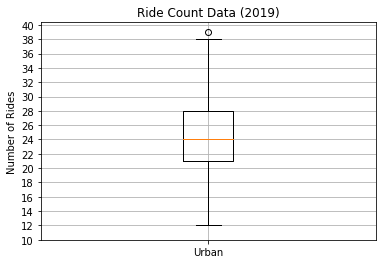

In [35]:
# 5.4.4 Create Box-and-Whisker Plots

# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()


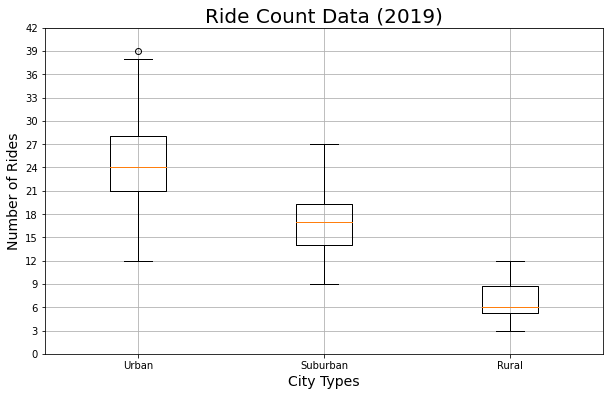

In [36]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

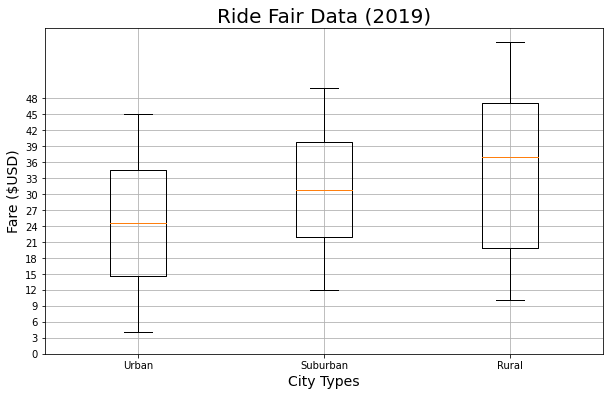

In [42]:
# Create a box-and-whisker plot for the urban, suburban and rural fare data.
x_labels = ["Urban", "Suburban","Rural"]
city_type_fares = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
# Add the title, y-axis label and grid.
ax.set_title('Ride Fair Data (2019)',fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(city_type_fares, labels=x_labels)
ax.set_yticks(np.arange(0, 51, step=3.0))
ax.grid()
plt.savefig("analysis/Fig2b.png")
plt.show()


In [50]:
# 5.5.1 Get the Percentage of Fares for Each City Type

# 1. Get the total fares for each city type.
# 2. Get the total for all the fares for all the city types.
# 3. Calculate the percentage of the total fares for each city type.

# urban_fares_total = np.sum(urban_cities_df["fare"])   my way
# suburban_fares_total = np.sum(suburban_cities_df["fare"])   my way
# rural_fares_total = np.sum(rural_cities_df["fare"])   my way

# urban_fares_total, suburban_fares_total, rural_fares_total   my way



# *****or****
# 1. Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]

# 2. Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()

# 3. Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares

sum_fares_by_type, total_fares, type_percents




(type
 Rural        4327.93
 Suburban    19356.33
 Urban       39854.38
 Name: fare, dtype: float64,
 63538.64,
 type
 Rural        6.811493
 Suburban    30.463872
 Urban       62.724635
 Name: fare, dtype: float64)

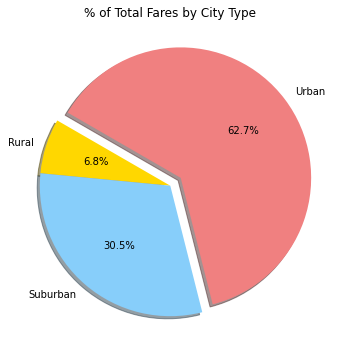

In [51]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl



# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()



 #  rcParams accesses the run and configure settings for the Matplotlib parameters

In [56]:
# 5.6.1 Calculate Ride Percentages


# 1. Get the total number of rides for each city type.
# 2. Get the total rides for all the city types.
# 3. Calculate the percentage of the total rides for each city type.


# 1. Get the total number of rides for each city type.
sum_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]

# 2. Get the total rides for all the city types.
total_rides = pyber_data_df["ride_id"].count()

# 3. Calculate the percentage of the total rides for each city type.
ride_percents = 100 * sum_rides_by_type / total_rides


# *****or****
# ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()


sum_rides_by_type, total_rides, ride_percents

(type
 Rural        125
 Suburban     625
 Urban       1625
 Name: ride_id, dtype: int64,
 2375,
 type
 Rural        5.263158
 Suburban    26.315789
 Urban       68.421053
 Name: ride_id, dtype: float64)

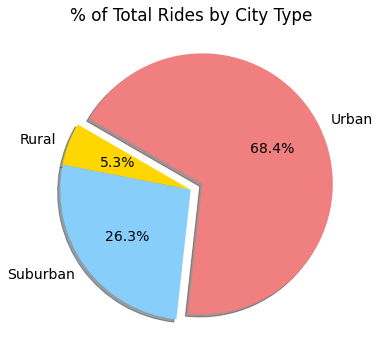

In [55]:
# 5.6.2 Pie Chart for Percentage of Rides by City Type

# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

In [61]:
# 5.7.1 Calculate Driver Percentages

# 1. Use the groupby() function on the city_data_df DataFrame and group by the "type" of city column.
# 2. Apply the sum() function on the "driver_count" column to get the Series with the total number of drivers for each city type.
# 3. Get the total number of drivers using the sum() function on the "driver_count" column on the city_data_df DataFrame.
# 4. Divide the Series for the total number of drivers for each city type by the number of total drivers and multiply by 100.

# driver_percents = (pyber_data_df.groupby(["type"]).sum()["driver_count"] /
#                                       pyber_data_df["driver_count"].sum())*100


# driver_percents

# above, I did analysis on grouped dataframe, pyber_data.  Instructions (below) state to perform on city_data_df
# why? and why different results??

# Calculate the percentage of drivers for each city type.
driver_percents = 100 *
city_data_df.groupby(["type"]).sum()["driver_count"] /
city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

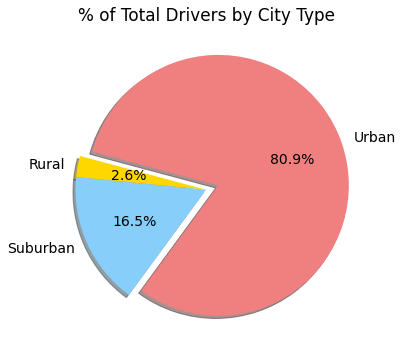

In [62]:
# 5.7.2 Pie Chart for the Percentage of Drivers for Each City Type

# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()